# Homework# 1

# Name: Dimitrios Mavrofridis
# NetID: 3377133

## Due date: Monday, January 17, 2022 at 3:30pm
## 10pts

### Task 1: Build a neural network to train and overfit the noisy $sin$ sample data

### Task 2: Build multiple neural networks and use different hyperparameters and activation functions in the process

### Task 3: Write a report explaining your findings related to different selections of hyperparameters. (Support your report with loss graphs, prediction fit to the test data).
1. learning rate.
2. activation functions.
3. depth of network (number of hidden layers).
3. width of network (number of neurons in layers).

In [1]:
import torch
torch.manual_seed(0)
from torch import nn
from torch import optim
from torch.utils.data import random_split

import numpy as np

import matplotlib.pyplot as plt

# Add this to wrap the text above the plots for long model names!
from textwrap import wrap


# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load and prepare the data by spliting it into a training set and a validation set

## 1. load the data from data.csv

In [2]:
data = np.loadtxt('data.csv', delimiter=',')

## 2. suffle the dataset

In [3]:
tensor_data = torch.from_numpy(data).float()
idx = torch.randperm(tensor_data.shape[0])
tensor_data = tensor_data[idx].view(tensor_data.size())

## 3. split the dataset into training and validation

In [4]:
train_data, test_data = random_split(tensor_data, [150, 50])
train_data, validation_data = random_split(train_data, [100, 50])

In [5]:
train_x = tensor_data[train_data.indices].numpy()[:,:-1]
train_y = tensor_data[train_data.indices].numpy()[:,-1:]
validation_x = tensor_data[validation_data.indices].numpy()[:,:-1]
validation_y = tensor_data[validation_data.indices].numpy()[:,-1:]
test_x = tensor_data[test_data.indices].numpy()[:,:-1]
test_y = tensor_data[test_data.indices].numpy()[:,-1:]

## 4. plot each of the train and validation datasets

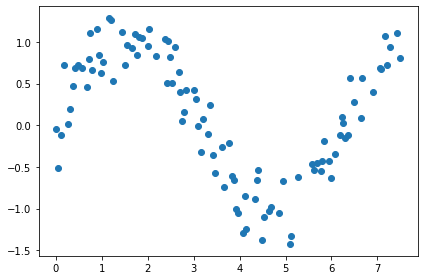

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_x, train_y)


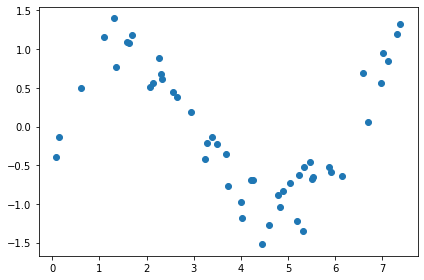

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(validation_x, validation_y)

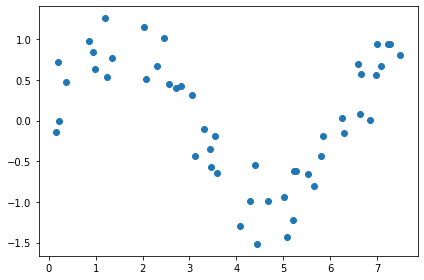

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_x, test_y)

## helper function to make predictions

In [9]:
def predict(trained_model, x):
    with torch.no_grad():
        logits = trained_model(x)
    return logits.numpy()

## convert numpy arrays to pytorch tensors

In [10]:
train_x = torch.from_numpy(np.array(train_x)).float()
train_y = torch.from_numpy(np.array(train_y)).float()

validation_x = torch.from_numpy(np.array(validation_x)).float()
validation_y = torch.from_numpy(np.array(validation_y)).float()

test_x = torch.from_numpy(np.array(test_x)).float()
test_y = torch.from_numpy(np.array(test_y)).float()

# Example Network

## set your hyperparameters and define model

In [11]:
number_of_epochs = 100
learning_rate = 1e-2

example_model = nn.Sequential(
    nn.Linear(1, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

optimizer = optim.SGD(example_model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [12]:
def train_model(model, optimizer, loss, number_of_epochs, learning_rate):
    train_losses_history = []
    validation_losses_history = []

    for epoch in range(number_of_epochs):
        train_losses = []

        # training steps
        # forward pass
        logits = model(train_x)

        # compute the objective function
        objective = loss(logits, train_y)

        # clean the gradients
        model.zero_grad()

        # computer the partial derivative of the gradients of the objective function wrt to the parameters
        objective.backward()

        # step in the opposite direction of the gradient
        optimizer.step()

        train_losses = objective.item()
        train_mean_loss = torch.tensor(train_losses).mean().item()
        train_losses_history.append(train_mean_loss)

        validation_losses = []

        # validation steps
        # forward pass
        with torch.no_grad():
            logits = model(validation_x)

        # compute the objective function
        objective = loss(logits, validation_y)

        validation_losses = objective.item()
        validation_mean_loss = torch.tensor(validation_losses).mean().item()

#         print(f"Epoch# {epoch + 1}, training loss {mean_loss}, validation loss {validation_mean_loss}")
        validation_losses_history.append(validation_mean_loss)
    return train_losses_history, validation_losses_history

In [13]:
train_loss, validation_loss = train_model(example_model, optimizer, loss, number_of_epochs, learning_rate)

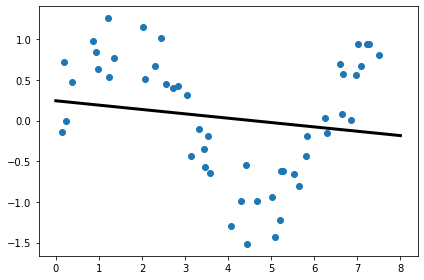

In [14]:
fig = plt.figure()
ax = plt.axes()
# x = x.numpy()
# y = y.numpy()
ax.scatter(test_x, test_y)
x1 = torch.tensor(np.linspace(0, 8.0, 200).reshape(-1,1)).float()
ax.plot(x1, predict(example_model, x1), "k", linewidth=3)

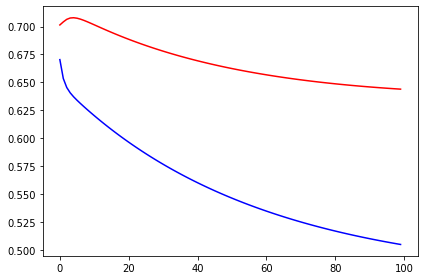

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(train_loss, "b")
ax.plot(validation_loss, "r")

# Q0: Study the above example to understand the training and validation loop. You will be training a set of models to fit the loaded data.

# Q1 (3pts): The following two cells display an output of a model that is overfitting the data. Try to build a model that achieves the same goal. (hint: go for width and depth.)

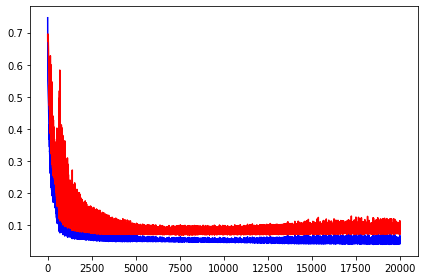

In [16]:
# Overfitting Model
number_of_epochs = 20000
learning_rate = 0.1

complex_model = nn.Sequential(
      nn.Linear(1, 50),
      nn.LeakyReLU(),
      nn.Linear(50, 150),
      nn.LeakyReLU(),
      nn.Linear(150, 100),
      nn.LeakyReLU(),
      nn.Linear(100, 70),
      nn.LeakyReLU(),
      nn.Linear(70, 40),
      nn.LeakyReLU(),
      nn.Linear(40, 10),
      nn.LeakyReLU(),
      nn.Linear(10, 1)
)

optimizer = optim.SGD(complex_model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

train_loss, validation_loss = train_model(complex_model, optimizer, loss, number_of_epochs, learning_rate)
fig = plt.figure()
ax = plt.axes()
ax.plot(train_loss, "b")
ax.plot(validation_loss, "r")

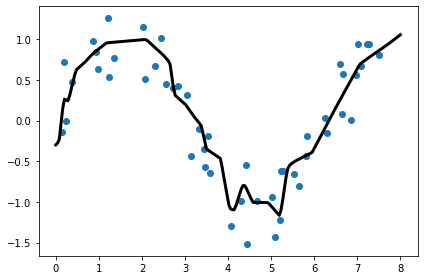

In [17]:
fig = plt.figure()
ax = plt.axes()
# x = x.numpy()
# y = y.numpy()
ax.scatter(test_x, test_y)
x1 = torch.tensor(np.linspace(0, 8.0, 200).reshape(-1,1)).float()
ax.plot(x1, predict(complex_model, x1), "k", linewidth=3)

# Q2 (4 pts): Duplicate the above two cells and experiment creating different networks, experiment with the depth and the width of networks, the learning rate, the number of epochs, and the activation function.

Some examples:
1. learning rate: 0.1, 0.01, 0.001 etc.
2. activation functions: tanh, sigmoid, relu etc.
3. depth of network: 2 hidden layers, 3 hidden layers, 4 hidden layers, etc.

In [18]:
def nn_model_generator (activation = nn.ReLU(), input = 1, output =1, hidden_layers = 2, width = 5):
        
  layers = []
  current_input = input
  hidden_layer_nodes = width * hidden_layers

  # Generate input and the hiden layers
  for i in range(0, hidden_layers):
      layers.append(nn.Linear(current_input, hidden_layer_nodes))
      layers.append(activation)
      current_input = hidden_layer_nodes
      hidden_layer_nodes -= width

  # Generate the output layer after the for loop is done 
  layers.append(nn.Linear(current_input, output))
  net = nn.Sequential(*layers)

  return net

        

In [19]:
def run_neural_network(activation = nn.ReLU(), input = 1, output =1, epochs = 1000, hidden_layers = 2, width = 5, learning_rate = 1e-2):
    
  # Generate the NN model dynamically using the function above
  dynamic_nn_model = nn_model_generator(activation, input, output, hidden_layers, width)

  optimizer = optim.SGD(dynamic_nn_model.parameters(), lr=learning_rate)
  loss = nn.MSELoss()

  # Train and test validate the model
  train_loss, validation_loss = train_model(dynamic_nn_model, optimizer, loss, number_of_epochs, learning_rate)

  return train_loss, validation_loss, dynamic_nn_model

In [20]:
def calculate_loss(list_of_loss):
  sum_loss = 0
  for loss in list_of_loss:
    sum_loss += loss
  return sum_loss / len(list_of_loss)

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 2, Width -> 5
MSE, Train -> 0.239 and Validation -> 0.319

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 2, Width -> 10
MSE, Train -> 0.222 and Validation -> 0.304

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 2, Width -> 15
MSE, Train -> 0.314 and Validation -> 0.439

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 2, Width -> 20
MSE, Train -> 0.552 and Validation -> 0.711

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 5, Width -> 5
MSE, Train -> 0.305 and Validation -> 0.426

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 5, Width -> 10
MSE, Train -> 0.209 and Validation -> 0.289

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 5, Width -> 15
MSE, Train -> 0.208 and Validation -> 0.284

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 5, Width -> 20
MSE, Train -> 0.21 and Validation -> 0.287

LR -> 0.1, Activation -> ReLU(), Hidden Layers -> 8, Width -> 5
MSE, Train -> 0.461 and Validation -> 0.601

LR -> 0.1, Act

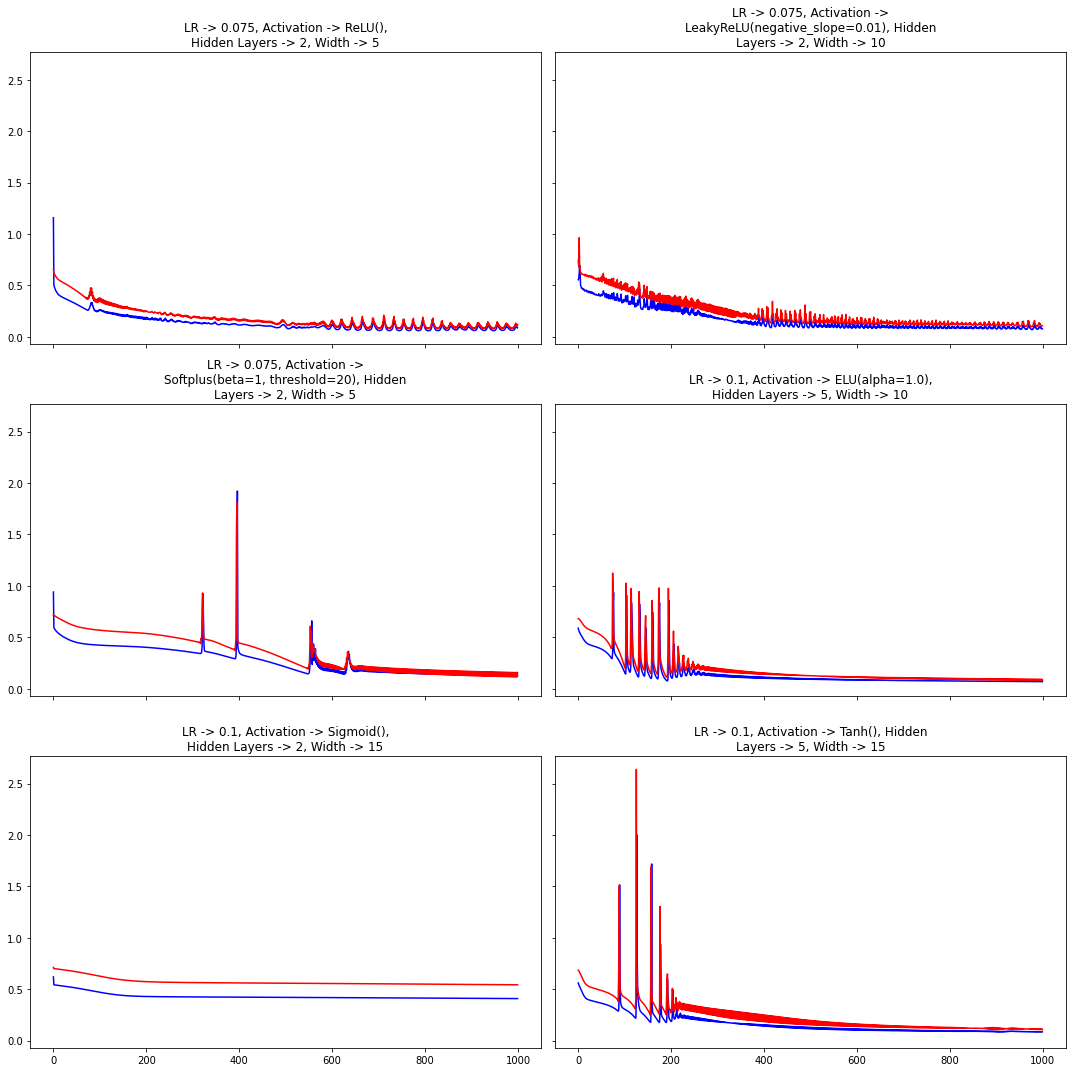

In [30]:
# This is the main code which will create (train and test / validate) all of the following NN combinations
learning_rates = [0.1, 0.075, 0.05, 0.01, 0.001]
activation_functions = [nn.ReLU(), nn.LeakyReLU(), nn.Softplus(), nn.ELU(), nn.Sigmoid(), nn.Tanh()]
hidden_layer_list = [2, 5, 8, 11]
width_list = [5, 10, 15, 20]
number_of_epochs = 1000


best_models = {}

for activation_function in activation_functions:

  min_validation_MSE = 1000000000
  best_model = []

  for learning_rate in learning_rates:  
    for hidden_layers in hidden_layer_list:
      for width in width_list:
        train_loss, validation_loss, nn_model = run_neural_network(activation = activation_function, epochs = number_of_epochs, hidden_layers = hidden_layers, width = width, learning_rate = learning_rate )
        nn_model_name = "LR -> " + str(learning_rate) + ", Activation -> " + str(activation_function) + ", Hidden Layers -> " + str(hidden_layers) + ", Width -> " + str(width)
        train_MSE = round(calculate_loss(train_loss), 3)
        validation_MSE = round(calculate_loss(validation_loss), 3)
        
        print(nn_model_name)
        print("MSE, Train -> " + str(train_MSE) + " and Validation -> " + str(validation_MSE) + "\n")

        if min_validation_MSE > validation_MSE:
          best_model = [train_loss, validation_loss, nn_model_name]
          min_validation_MSE = validation_MSE

  best_models[str(activation_function)] = best_model


# Now we plot the graphs 
fig, axs = plt.subplots(ncols=2, nrows= 3, sharex=True, sharey=True, figsize = (15,15))
axs = axs.ravel()
model_counter = 0

for key, value in best_models.items():
  axs[model_counter].plot(value[0], "b")
  axs[model_counter].plot(value[1], "r")
  title = "\n".join(wrap(value[2], 40))
  axs[model_counter].set_title(title)
  model_counter += 1



# Q3 (3 pts): Use markdown and write a few paragraphs explaining your finding from the above experiments. Describe how do you interpret each network performance was affected by the hyperparameters and design. (Hint: Explain it as if you're presenting to a non-technical individual.)

# Question 1: 
For Question 1, the objetive was to alter the hyperparameters of the model in order to make it overfit the training data. After testing many different scenarios it was clear that the number of epochs (iterations) as well as the learning rate played a major role in achieving our goal. First, I optimized the learning rate by setting it to approximately 0.1 which is relatively large, as I noticed that with a very small learning rate the model would not overfit the training data. Thus, after setting the appropriate learning rate, we can now identify the overfitting of the training data using the generated graphs, as the line applies directly to the drawn dots on the screen. The second step to promoting the overfitting of the model was to drastically increase the complexity of the structure of the neural network both in terms of depth and width. After many tests, the most appropriate structure to overfit the network was to construct a custom network with 7 layers (one input, one output) and 5 hidden layers with values increasing to 150 while reducing down to 10 by alterating the rate of width in the network from subtracting 50 and 30 respectively after each activation function. This generated the best results for overfitting the custom network for the first Question.

# Question 2: 
For the second question, I decided to take a dynamic approach in constucting all the possible combinations a neural network model could take given the list of inputs i declared for the learning rate, width, depth as well as for six different activation functions. As a result, I constucted two different functions which allow the sequential network to be generated from scratch according to the given parametets using the nn_model_generator() method. Additionally, another function was developed which runs and trains the generated network while returning a tuple of information regarding the training and validation loss, as well as the generated NN model, which are later used to determine the best and most effective model combination using the MSE. Finally, a block of code is used which contains all the declarations allowing all the possible Neural Network model combinations to be generated and trained while returning the required information. Furthermore, the MSE from the validation results is calculated in each iteration after the network formulation and training in orer to determine which combination of attributes generated the best possible model (optimal) for each activation function. This means that a custom made algorithm was developed which searches for the model with the minimum squared error for the validation set. This ensures that the best and most efficient and optimal models are generated, trained and selected after exhausting every possible combination of hyperparameter tunning and attribute initialiation. At the same time the results are being printed on screen while also saving the best NN model combination for each activation function in a custom dictionary. In the end, the best (saved) models are used to generate subplots using the matplot lib in order to show the top models for each one of the activation functions followed by the attributes that yielded those results (hidden layers, width, learning rate). It is important to acknowledge that many different nubmers of epochs were tested but eventually I decided to keep it close to 1000 in order to avoid long computations and training time due to the complexity of the combinatorial algorithm due to its nature of generating every possible neural netowrk model within our scope! The results and most effective models can be easily identified using the generated graphs and logs.


